# Model Building
This notebooks contains the the model building for the first iteration - including model optimization via gridsearch

# Imports

In [10]:
# Necessary to import custom modules
import os
os.chdir("/home/jovyan/work")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)

# Construct data

In [11]:
# read features and drop obsolete ones
df_raw = pd.read_csv("./data/features/second_iteration.csv")

df_raw.head()

,avg_GamesPlayed_home,avg_Fg2PtAtt_home,avg_Fg2PtAttPerGame_home,avg_Fg2PtMade_home,avg_Fg2PtMadePerGame_home,avg_Fg2PtPct_home,avg_Fg3PtAtt_home,avg_Fg3PtAttPerGame_home,avg_Fg3PtMade_home,avg_Fg3PtMadePerGame_home,...,avg_FoulPersPerGame_guest,avg_PlusMinus_guest,avg_PlusMinusPerGame_guest,avg_MinSeconds_guest,avg_MinSecondsPerGame_guest,team_guest,season,score_home,score_guest,home_win
0,80.8,452.8,5.2,229.2,2.40,51.00,259.20,2.60,92.0,0.6,...,2.200000,-96.200000,-0.800000,147689.0,1818.000000,Minnesota Timberwolves,2016/2017,84,92,0
1,80.5,511.0,6.0,259.0,2.75,51.25,224.75,2.25,75.5,0.5,...,1.750000,-364.500000,-5.000000,103625.5,1479.750000,Philadelphia 76ers,2016/2017,110,93,1
2,79.2,425.8,4.8,212.8,2.20,50.60,242.40,2.40,86.0,0.6,...,1.666667,-168.666667,-1.666667,123819.0,1526.666667,Milwaukee Bucks,2016/2017,107,100,1
3,80.5,511.0,6.0,259.0,2.75,51.25,224.75,2.25,75.5,0.5,...,2.250000,120.750000,1.250000,131729.5,1949.500000,Detroit Pistons,2016/2017,105,98,1
4,66.5,332.0,4.0,159.0,2.00,50.00,191.00,2.50,62.5,0.5,...,1.500000,-202.000000,-2.500000,86731.5,1337.500000,Phoenix Suns,2016/2017,95,91,1


In [12]:
# construct training data
df_train = \
    df_raw[df_raw["season"].isin(["2016/2017"])]\
    .drop(["team_home", "team_guest", "score_home", "score_guest", "season"], axis=1)

X_train, y_train = df_train.drop(["home_win"], axis=1).values, df_train["home_win"].values

# construct final validation data
df_val = \
    df_raw[df_raw["season"] == "2017/2018"]\
    .drop(["team_home", "team_guest", "score_home", "score_guest", "season"]
          + [col for col in df_raw.columns if "2017/2018" in col] , axis=1)
X_val, y_val = df_val.drop(["home_win"], axis=1).values, df_val["home_win"].values

# Baseline

### Predict always win

In [12]:
log_loss(y_val, np.ones_like(y_val))

14.504364428156217

### Predict always loss

In [13]:
log_loss(y_val, np.zeros_like(y_val))

20.034747745413874

### Predict always draw

In [14]:
log_loss(y_val, np.ones_like(y_val)*.5)

0.69314718055994529

# Logistic Regression

In [18]:
# parameter grid
pg_lr = {
    "penalty": ["l1", "l2"],
    "C": [0.001, 0.01, 0.1, 1.0, 10],
}

# cross validated estimator
GS_LR = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=pg_lr,
    cv=5,
    n_jobs=-1,
    scoring="neg_log_loss"
)

# model fitting
GS_LR.fit(X_train, y_train)

# evaluate on validation set
log_loss(y_val, GS_LR.predict_proba(X_val))

0.64703171907337986

# Random Forest

In [16]:
# parameter grid
param_grid = {
    "n_estimators": [10, 15, 20],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_samples_split": [2, 3, 4, 5]
}

# cross validated estimator
GS_RF = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    scoring="neg_log_loss"
)

# model fitting
GS_RF.fit(X_train, y_train)

# evaluate on validation set
log_loss(y_val, GS_RF.predict_proba(X_val))

0.69730383803716067

***
# Advanced
In addition to a simple point average, all averaged stats shall be put into the feature vector.

### Construct data

In [13]:
# read features and drop obsolete ones
df_raw_adv = pd.read_csv("./data/features/second_iteration_advanced.csv")

df_raw_adv.head()

,avg_GamesPlayed_home,avg_Fg2PtAtt_home,avg_Fg2PtAttPerGame_home,avg_Fg2PtMade_home,avg_Fg2PtMadePerGame_home,avg_Fg2PtPct_home,avg_Fg3PtAtt_home,avg_Fg3PtAttPerGame_home,avg_Fg3PtMade_home,avg_Fg3PtMadePerGame_home,...,avg_FoulPersPerGame_guest,avg_PlusMinus_guest,avg_PlusMinusPerGame_guest,avg_MinSeconds_guest,avg_MinSecondsPerGame_guest,team_guest,season,score_home,score_guest,home_win
0,80.8,452.8,5.2,229.2,2.40,51.00,259.20,2.60,92.0,0.6,...,2.200000,-96.200000,-0.800000,147689.0,1818.000000,Minnesota Timberwolves,2016/2017,84,92,0
1,80.5,511.0,6.0,259.0,2.75,51.25,224.75,2.25,75.5,0.5,...,1.750000,-364.500000,-5.000000,103625.5,1479.750000,Philadelphia 76ers,2016/2017,110,93,1
2,79.2,425.8,4.8,212.8,2.20,50.60,242.40,2.40,86.0,0.6,...,1.666667,-168.666667,-1.666667,123819.0,1526.666667,Milwaukee Bucks,2016/2017,107,100,1
3,80.5,511.0,6.0,259.0,2.75,51.25,224.75,2.25,75.5,0.5,...,2.250000,120.750000,1.250000,131729.5,1949.500000,Detroit Pistons,2016/2017,105,98,1
4,66.5,332.0,4.0,159.0,2.00,50.00,191.00,2.50,62.5,0.5,...,1.500000,-202.000000,-2.500000,86731.5,1337.500000,Phoenix Suns,2016/2017,95,91,1


In [14]:
# construct training data
df_train = \
    df_raw_adv[df_raw_adv["season"].isin(["2016/2017"])]\
    .drop(["team_home", "team_guest", "score_home", "score_guest", "season"], axis=1)

X_train, y_train = df_train.drop(["home_win"], axis=1).values, df_train["home_win"].values

# construct final validation data
df_val = \
    df_raw_adv[df_raw_adv["season"] == "2017/2018"]\
    .drop(["team_home", "team_guest", "score_home", "score_guest", "season"]
          + [col for col in df_raw.columns if "2017/2018" in col] , axis=1)
X_val, y_val = df_val.drop(["home_win"], axis=1).values, df_val["home_win"].values

# Logistic Regression

In [128]:
# parameter grid
pg_lr = {
    "penalty": ["l1", "l2"],
    "C": [0.001, 0.01, 0.1, 1.0, 10],
}

# cross validated estimator
GS_LR = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=pg_lr,
    cv=5,
    n_jobs=-1,
    scoring="neg_log_loss"
)

# model fitting
GS_LR.fit(X_train, y_train)

# evaluate on validation set
log_loss(y_val, GS_LR.predict_proba(X_val))

0.62967027850071611

# Random Forest

In [125]:
# parameter grid
param_grid = {
    "n_estimators": [10, 15, 20, 25, 30],
    "min_samples_leaf": [1, 5, 10, 15, 20, 25, 30, 35],
    "min_samples_split": [2, 3, 4, 5]
}

# cross validated estimator
GS_RF = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    scoring="neg_log_loss"
)

# model fitting
GS_RF.fit(X_train, y_train)

# evaluate on validation set
log_loss(y_val, GS_RF.predict_proba(X_val))

0.63701172491842128

In [141]:
GS_RF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams["figure.figsize"] = (15, 15)

In [101]:
%config InlineBackend.figure_format='retina'

0.603548667478
0.59764776731
0.646738086544
0.631484358983


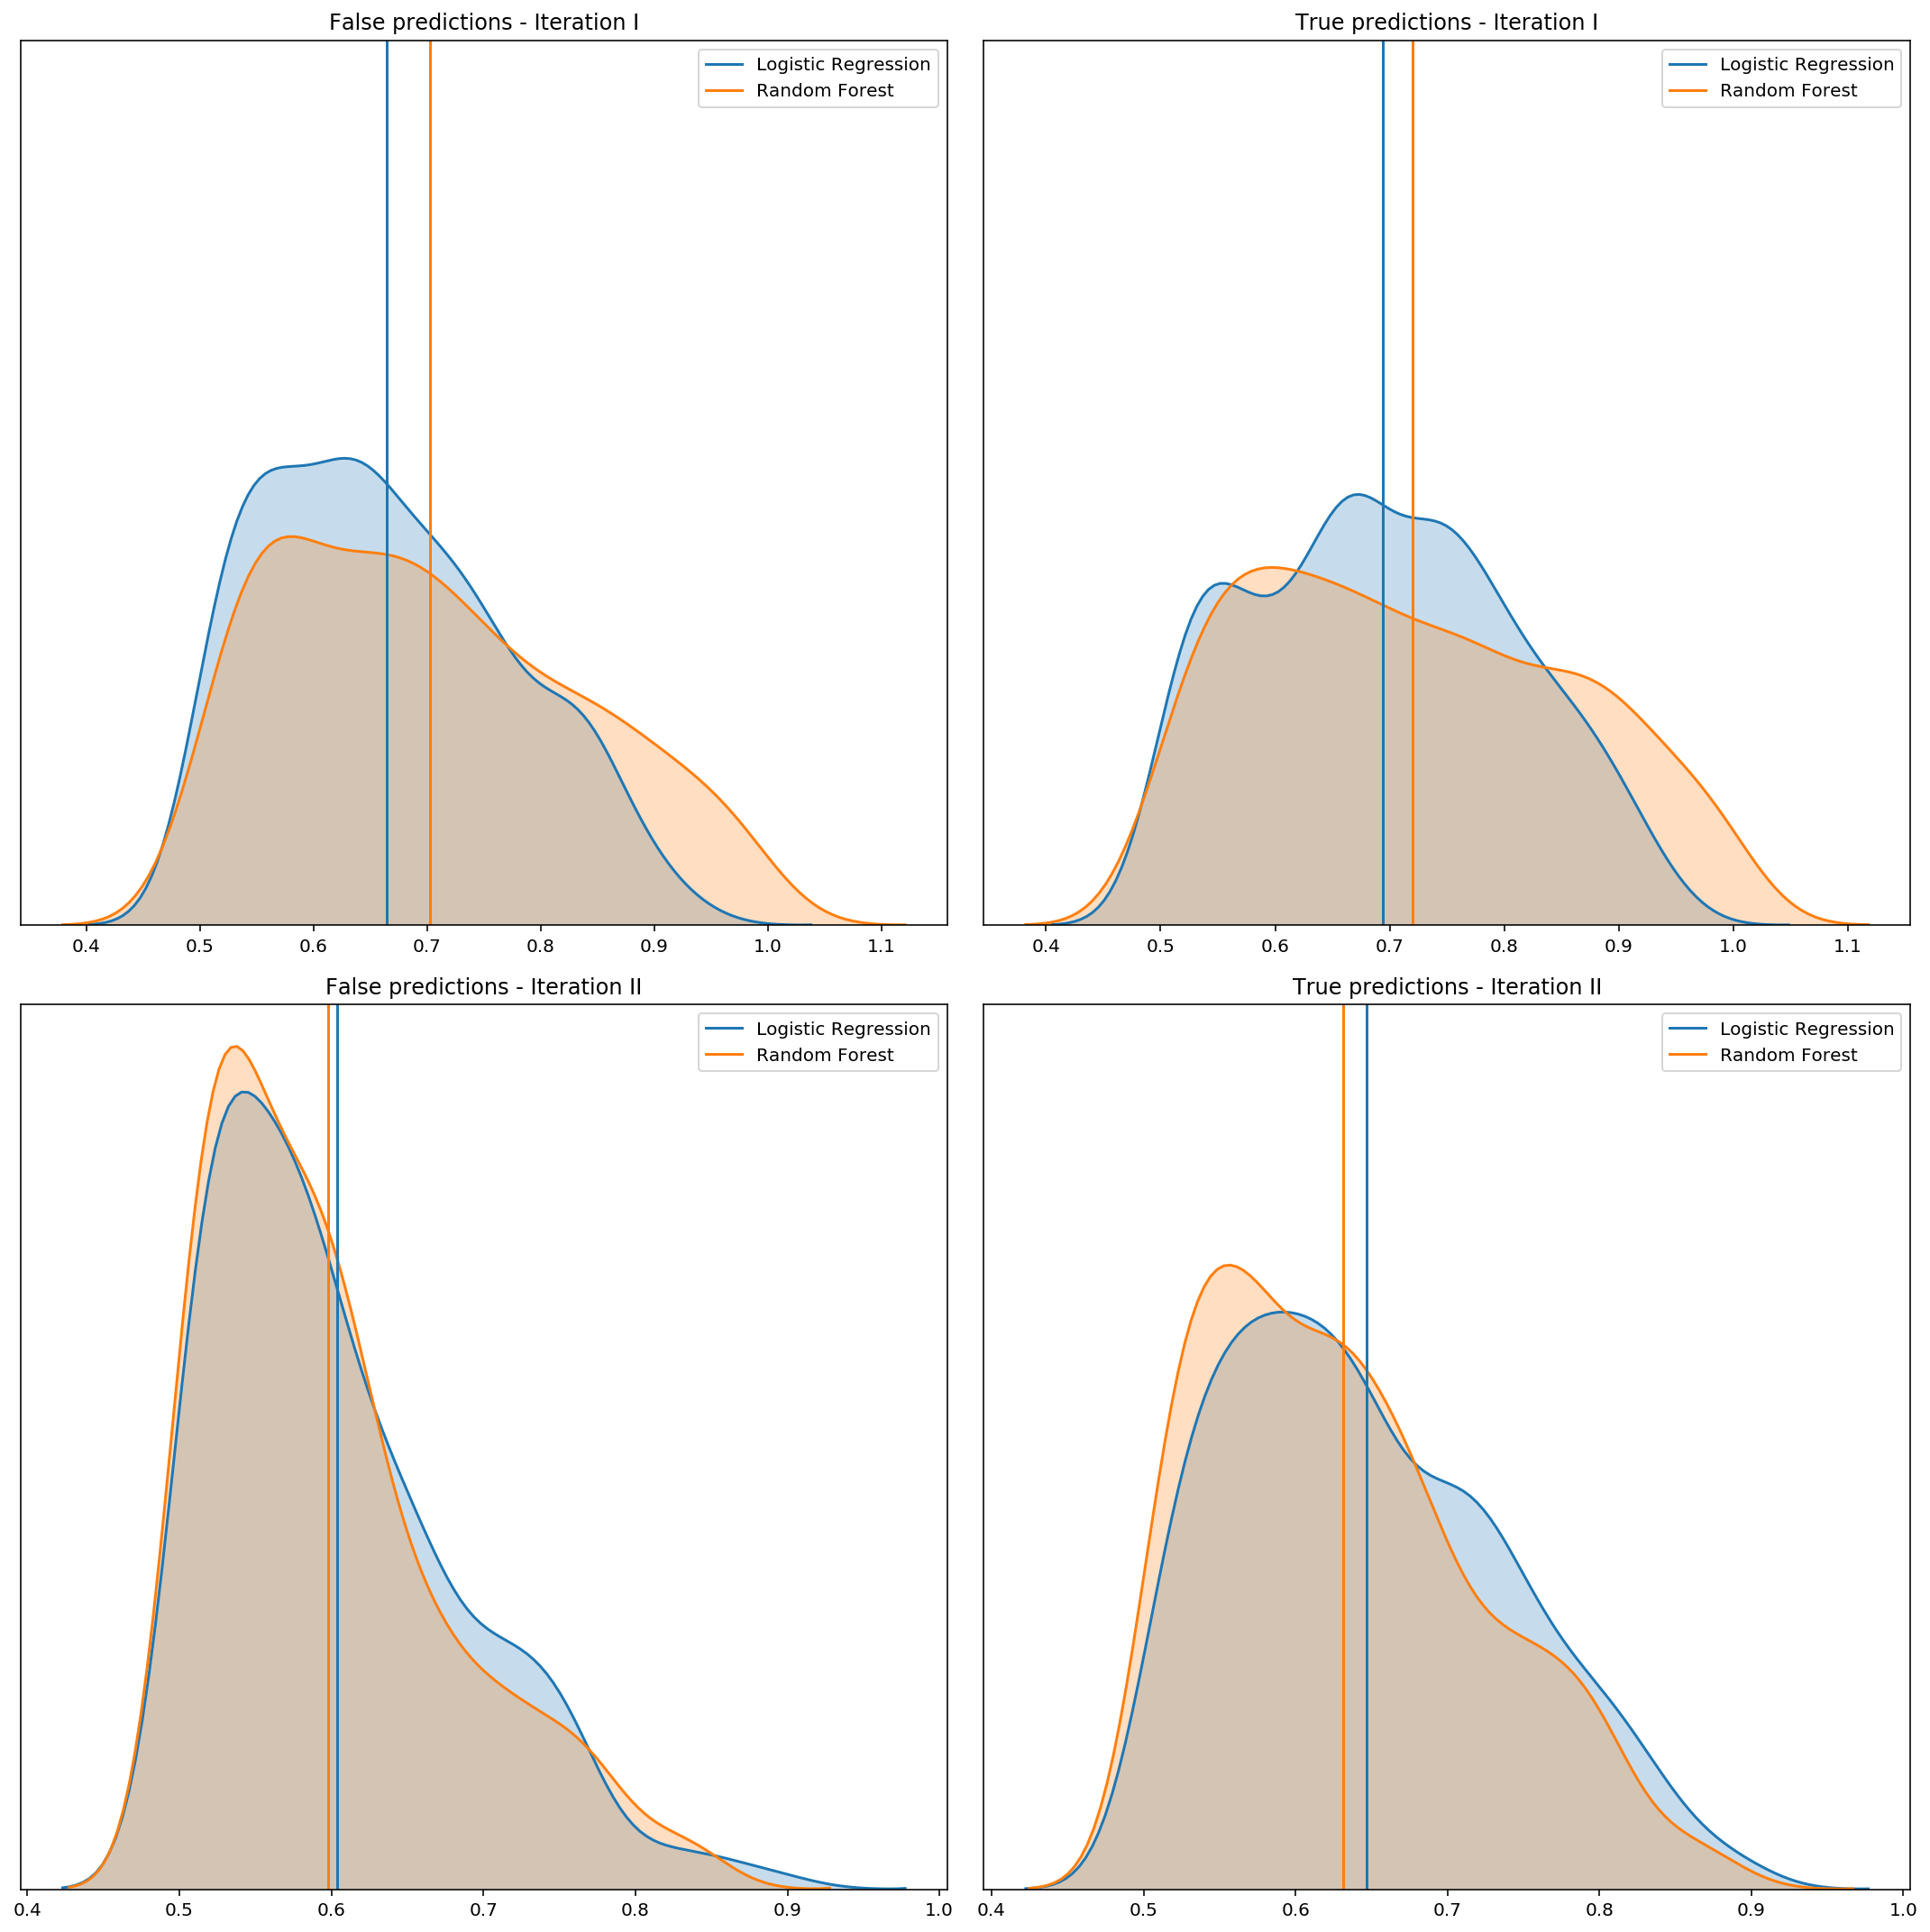

In [138]:
### PLOT I/IV
ax1 = plt.subplot(221)
sns.kdeplot(y_wrong_lr, shade=True, label="Logistic Regression")
sns.kdeplot(y_wrong_rf, shade=True, label="Random Forest")
plt.axvline(x=np.mean(y_wrong_lr), color='#1f77b4')
plt.axvline(x=np.mean(y_wrong_rf), color='#ff7f0e')
plt.yticks([])
plt.title("False predictions - Iteration I");

### PLOT II/IV
ax2 = plt.subplot(222, sharey=ax1)
sns.kdeplot(y_right_lr, shade=True, label="Logistic Regression")
sns.kdeplot(y_right_rf, shade=True, label="Random Forest")
plt.axvline(x=np.mean(y_right_lr), color='#1f77b4')
plt.axvline(x=np.mean(y_right_rf), color='#ff7f0e')
plt.yticks([])
plt.title("True predictions - Iteration I");

### PLOT III/IV
idx_lr_wrong = GS_LR.predict(X_val) != y_val
res_lr = []
for preds in GS_LR.predict_proba(X_val)[idx_lr_wrong]:
    res_lr.append(max(preds))
    
idx_lr_wrong = GS_RF.predict(X_val) != y_val
res_rf = []
for preds in GS_RF.predict_proba(X_val)[idx_lr_wrong]:
    res_rf.append(max(preds))

ax3 = plt.subplot(223, sharey=ax1)
sns.kdeplot(res_lr, shade=True, label="Logistic Regression")
sns.kdeplot(res_rf, shade=True, label="Random Forest")
plt.axvline(x=np.mean(res_lr), color='#1f77b4')
plt.axvline(x=np.mean(res_rf), color='#ff7f0e')
plt.yticks([])
plt.title("False predictions - Iteration II");
print(np.mean(res_lr))
print(np.mean(res_rf))

### PLOT II/IV
idx_lr_right = GS_LR.predict(X_val) == y_val
res_lr = []
for preds in GS_LR.predict_proba(X_val)[idx_lr_right]:
    res_lr.append(max(preds))
    
idx_lr_right = GS_RF.predict(X_val) == y_val
res_rf = []
for preds in GS_RF.predict_proba(X_val)[idx_lr_right]:
    res_rf.append(max(preds))

ax4 = plt.subplot(224, sharey=ax1)
sns.kdeplot(res_lr, shade=True, label="Logistic Regression")
sns.kdeplot(res_rf, shade=True, label="Random Forest")
plt.axvline(x=np.mean(res_lr), color='#1f77b4')
plt.axvline(x=np.mean(res_rf), color='#ff7f0e')
plt.yticks([])
plt.title("True predictions - Iteration II")
plt.tight_layout()
plt.savefig("results/2_2_prediction-overview.png")
print(np.mean(res_lr))
print(np.mean(res_rf))

In [146]:
forest = GS_RF.best_estimator_

In [151]:
X = df_val
importances = forest.feature_importances_

In [153]:
plt.rcParams["figure.figsize"] = (10,5)

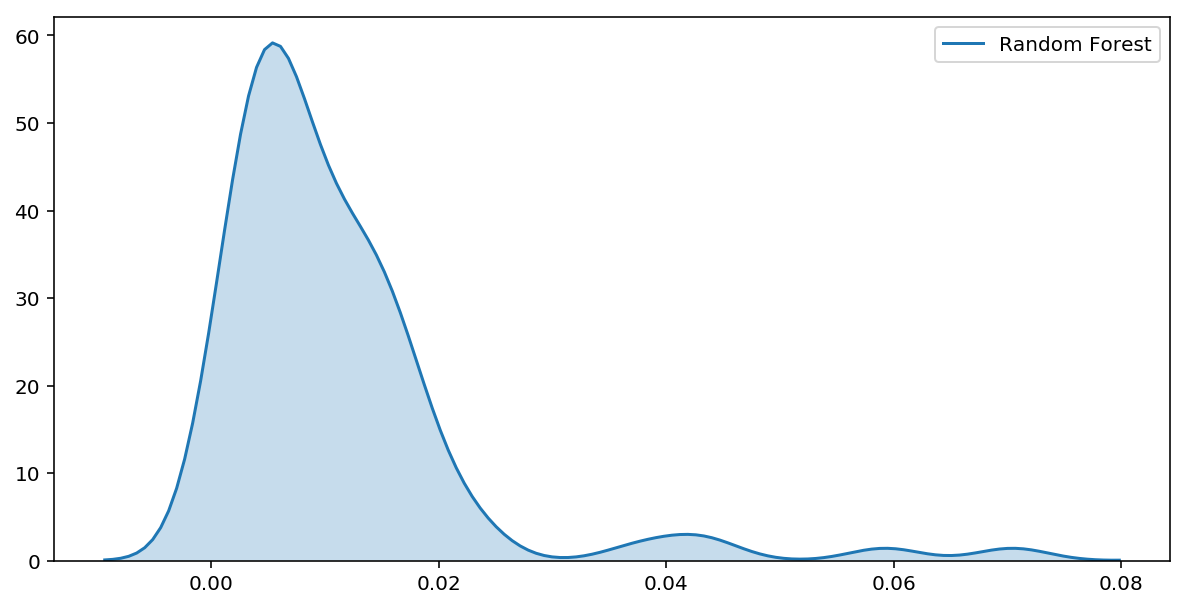

In [154]:
sns.kdeplot(importances, shade=True, label="Random Forest")

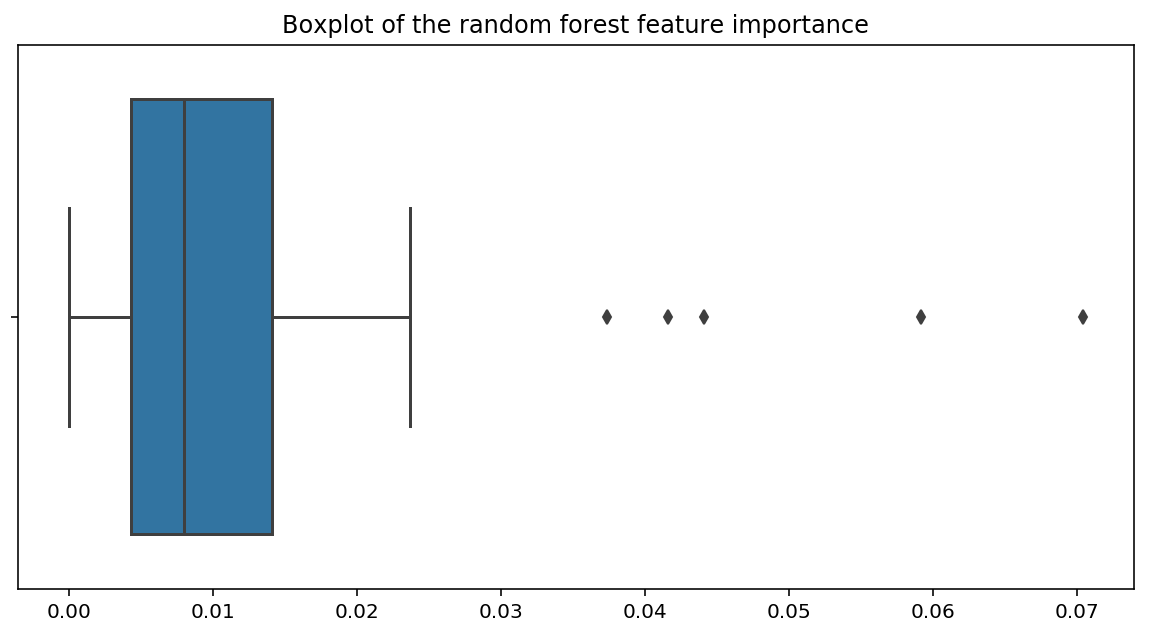

In [257]:
sns.boxplot(importances)
plt.title("Boxplot of the random forest feature importance")
plt.savefig("results/2_2_random_forest_feature_importance.png");

In [258]:
np.percentile(importances, 95)

0.03121939608964526

In [270]:
feats_rf = set()
for imp, col in sorted([(imp, col) for (imp, col) in zip(importances, cols) if imp >= 0.03], reverse=True):
    print("\item " + col.replace("_", "\_") + " (importance: " + str(imp) + ")")
    feats_rf.add(col)

\item avg\_PlusMinus\_guest (importance: 0.0704559138616)
\item avg\_PlusMinus\_home (importance: 0.0592252210312)
\item avg\_Ast\_home (importance: 0.044122437578)
\item avg\_PlusMinusPerGame\_guest (importance: 0.0416125000305)
\item avg\_PlusMinusPerGame\_home (importance: 0.0373646673405)


In [271]:
logreg = GS_LR.best_estimator_
coefs = logreg.coef_[0]
cols = df_val.drop(["home_win"], axis=1).columns
feats_lr = set()
for c, s, cl in sorted([(np.abs(coef), np.sign(coef), col) for (coef, col) in zip(coefs, cols) if coef  != 0], reverse=True):
    print("\item " + cl.replace("_", "\_") + " (coefficient: " + str(c*s) + ")")
    feats_lr.add(cl)

\item avg\_PlusMinus\_home (coefficient: 0.00177432309593)
\item avg\_PlusMinus\_guest (coefficient: -0.00177256391516)
\item avg\_Ast\_home (coefficient: 0.000433746778093)
\item avg\_FtAtt\_guest (coefficient: -0.000186209146394)
\item avg\_MinSecondsPerGame\_home (coefficient: 0.00016844893173)
\item avg\_Ast\_guest (coefficient: -8.6792872383e-05)
\item avg\_FgAtt\_guest (coefficient: 4.51190578719e-06)
\item avg\_MinSeconds\_home (coefficient: 3.63867126931e-06)
\item avg\_MinSeconds\_guest (coefficient: -3.07660439428e-06)


In [272]:
feats_lr

{'avg_Ast_guest',
 'avg_Ast_home',
 'avg_FgAtt_guest',
 'avg_FtAtt_guest',
 'avg_MinSecondsPerGame_home',
 'avg_MinSeconds_guest',
 'avg_MinSeconds_home',
 'avg_PlusMinus_guest',
 'avg_PlusMinus_home'}

In [273]:
feats_rf

{'avg_Ast_home',
 'avg_PlusMinusPerGame_guest',
 'avg_PlusMinusPerGame_home',
 'avg_PlusMinus_guest',
 'avg_PlusMinus_home'}

In [274]:
feats_lr.intersection(feats_rf)

{'avg_Ast_home', 'avg_PlusMinus_guest', 'avg_PlusMinus_home'}